In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt             # 日月光华QQ ： 2774881979

In [3]:
torch.__version__

'1.9.0'

In [4]:
data = pd.read_csv('./datasets/Income1.csv')

In [5]:
data.head()

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Education   30 non-null     float64
 2   Income      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


Text(0, 0.5, 'Income')

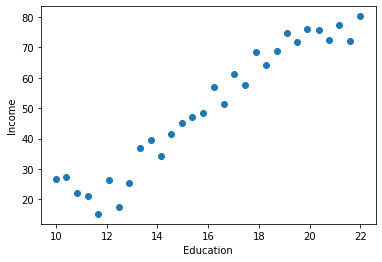

In [7]:
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')

In [12]:
X = torch.from_numpy(data.Education.values.reshape(-1, 1)).type(torch.FloatTensor)
Y = torch.from_numpy(data.Income.values.reshape(-1, 1)).type(torch.FloatTensor)

In [14]:
X.shape, Y.shape

(torch.Size([30, 1]), torch.Size([30, 1]))

In [16]:
from torch import nn

In [15]:
# 必须继承自 nn.Module

In [18]:
class EIModel(nn.Module):
    def __init__(self):
        super(EIModel, self).__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)
    def forward(self, inputs):
        logits = self.linear(inputs)
        return logits

In [19]:
model = EIModel()

In [20]:
model

EIModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [21]:
loss_fn = nn.MSELoss()

In [24]:
opt = torch.optim.SGD(model.parameters(), lr=0.0001)

In [25]:
for epoch in range(5000):
    for x, y in zip(X, Y):
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        opt.zero_grad()
        loss.backward()
        opt.step()

In [27]:
list(model.parameters())

[Parameter containing:
 tensor([[4.9781]], requires_grad=True),
 Parameter containing:
 tensor([-28.4347], requires_grad=True)]

In [30]:
list(model.named_parameters())

[('linear.weight',
  Parameter containing:
  tensor([[4.9781]], requires_grad=True)),
 ('linear.bias',
  Parameter containing:
  tensor([-28.4347], requires_grad=True))]

In [33]:
model.linear.weight, model.linear.bias

(Parameter containing:
 tensor([[4.9781]], requires_grad=True),
 Parameter containing:
 tensor([-28.4347], requires_grad=True))

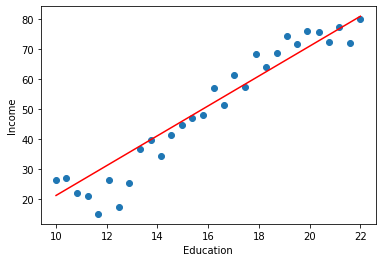

In [35]:
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')

plt.plot(X, model(X).detach().numpy(), c='r')

In [ ]:
1.输入数据处理
2.创建模型
3.训练
4.预测、评价